In [14]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#reading the dataset
df = pd.read_csv('dailyActivity_merged.csv')

In [3]:
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


**Preprocessing the Data**

In [4]:
#take an overview about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [5]:
#we here focus on totalsteps and minutes and it's relationship with calories burned. 
#we will remove the unnecessary columns
columns = ['Id', 'ActivityDate', 'TotalSteps', 'VeryActiveMinutes', 'FairlyActiveMinutes',
           'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

In [6]:
df = df[columns]
df

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,25,13,328,728,1985
1,1503960366,4/13/2016,10735,21,19,217,776,1797
2,1503960366,4/14/2016,10460,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,29,34,209,726,1745
4,1503960366,4/16/2016,12669,36,10,221,773,1863
...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,88,12,213,1127,3832


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    940 non-null    int64 
 1   ActivityDate          940 non-null    object
 2   TotalSteps            940 non-null    int64 
 3   VeryActiveMinutes     940 non-null    int64 
 4   FairlyActiveMinutes   940 non-null    int64 
 5   LightlyActiveMinutes  940 non-null    int64 
 6   SedentaryMinutes      940 non-null    int64 
 7   Calories              940 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 58.9+ KB


In [10]:
df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']
df

C:\Users\mahmo\AppData\Local\Temp\ipykernel_42268\2799088960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalMinutes'] = df.VeryActiveMinutes + df.FairlyActiveMinutes + df.SedentaryMinutes + df.LightlyActiveMinutes


,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
0,1503960366,4/12/2016,13162,25,13,328,728,1985,1094,18.0
1,1503960366,4/13/2016,10735,21,19,217,776,1797,1033,17.0
2,1503960366,4/14/2016,10460,30,11,181,1218,1776,1440,24.0
3,1503960366,4/15/2016,9762,29,34,209,726,1745,998,17.0
4,1503960366,4/16/2016,12669,36,10,221,773,1863,1040,17.0
...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,17,4,245,1174,2847,1440,24.0
936,8877689391,5/9/2016,20226,73,19,217,1131,3710,1440,24.0
937,8877689391,5/10/2016,10733,18,11,224,1187,2832,1440,24.0
938,8877689391,5/11/2016,21420,88,12,213,1127,3832,1440,24.0


In [11]:
df['TotalHours'] = round(df.TotalMinutes / 60)
df

C:\Users\mahmo\AppData\Local\Temp\ipykernel_42268\284028253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalHours'] = round(df.TotalMinutes / 60)


,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
0,1503960366,4/12/2016,13162,25,13,328,728,1985,1094,18.0
1,1503960366,4/13/2016,10735,21,19,217,776,1797,1033,17.0
2,1503960366,4/14/2016,10460,30,11,181,1218,1776,1440,24.0
3,1503960366,4/15/2016,9762,29,34,209,726,1745,998,17.0
4,1503960366,4/16/2016,12669,36,10,221,773,1863,1040,17.0
...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,17,4,245,1174,2847,1440,24.0
936,8877689391,5/9/2016,20226,73,19,217,1131,3710,1440,24.0
937,8877689391,5/10/2016,10733,18,11,224,1187,2832,1440,24.0
938,8877689391,5/11/2016,21420,88,12,213,1127,3832,1440,24.0


In [12]:
#convert the ActivityDate column to datetime type not object
df.ActivityDate = pd.to_datetime(df.ActivityDate)

C:\Users\mahmo\AppData\Local\Temp\ipykernel_42268\3699810799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ActivityDate = pd.to_datetime(df.ActivityDate)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    940 non-null    int64         
 1   ActivityDate          940 non-null    datetime64[ns]
 2   TotalSteps            940 non-null    int64         
 3   VeryActiveMinutes     940 non-null    int64         
 4   FairlyActiveMinutes   940 non-null    int64         
 5   LightlyActiveMinutes  940 non-null    int64         
 6   SedentaryMinutes      940 non-null    int64         
 7   Calories              940 non-null    int64         
 8   TotalMinutes          940 non-null    int64         
 9   TotalHours            940 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(8)
memory usage: 73.6 KB


In [16]:
df['DayOfWeek'] = df.ActivityDate.dt.day_name()
df

C:\Users\mahmo\AppData\Local\Temp\ipykernel_42268\4114648120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df.ActivityDate.dt.day_name()


,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours,DayOfWeek
0,1503960366,2016-04-12,13162,25,13,328,728,1985,1094,18.0,Tuesday
1,1503960366,2016-04-13,10735,21,19,217,776,1797,1033,17.0,Wednesday
2,1503960366,2016-04-14,10460,30,11,181,1218,1776,1440,24.0,Thursday
3,1503960366,2016-04-15,9762,29,34,209,726,1745,998,17.0,Friday
4,1503960366,2016-04-16,12669,36,10,221,773,1863,1040,17.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,17,4,245,1174,2847,1440,24.0,Sunday
936,8877689391,2016-05-09,20226,73,19,217,1131,3710,1440,24.0,Monday
937,8877689391,2016-05-10,10733,18,11,224,1187,2832,1440,24.0,Tuesday
938,8877689391,2016-05-11,21420,88,12,213,1127,3832,1440,24.0,Wednesday


In [17]:
#here we see if there's null data
df.isnull().sum()

Id                      0
ActivityDate            0
TotalSteps              0
VeryActiveMinutes       0
FairlyActiveMinutes     0
LightlyActiveMinutes    0
SedentaryMinutes        0
Calories                0
TotalMinutes            0
TotalHours              0
DayOfWeek               0
dtype: int64

In [18]:
#check about missing values
df.isna().sum()

Id                      0
ActivityDate            0
TotalSteps              0
VeryActiveMinutes       0
FairlyActiveMinutes     0
LightlyActiveMinutes    0
SedentaryMinutes        0
Calories                0
TotalMinutes            0
TotalHours              0
DayOfWeek               0
dtype: int64

In [20]:
df.duplicated().sum()

0

**Analysis and Visualization**

In [21]:
df.describe()

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000
std,2.424805e+09,NaN,5087.150742,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283


**we can notice from the TotalSteps, VeryActiveMinutes, FairlyActiveMinutes, and LightlyActiveMinutes Columns that most people do not practice sports because the big difference between Total steps and active steps**

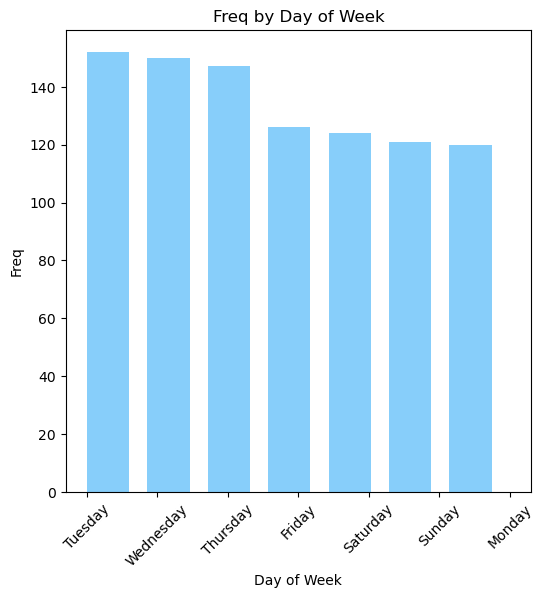

In [31]:
plt.figure(figsize=(6, 6))
plt.hist(df.DayOfWeek, bins=7, color='lightskyblue', width=0.6)


plt.xlabel('Day of Week')
plt.ylabel('Freq')
plt.xticks(rotation = 45)
plt.title('Freq by Day of Week');

**We notice that people are very active in tuesday, wednesday, and thursday, so we can send motivation message for people in the other days**

In [32]:
# Define the Numerical Values to find the relationship between these columns and the calories column
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()

<Axes: >

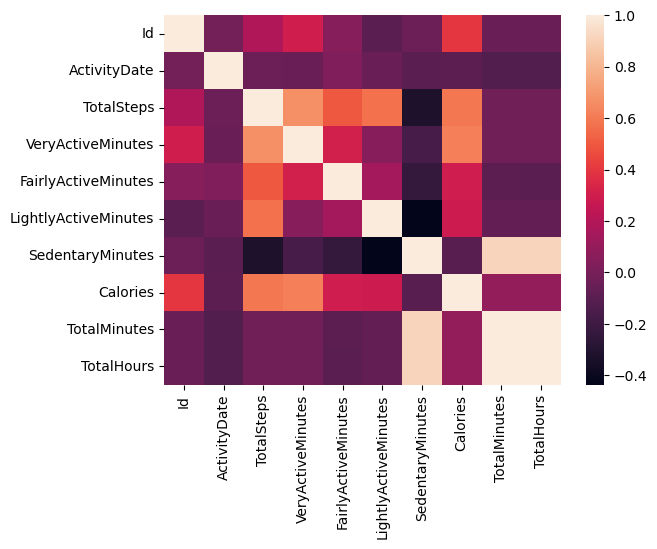

In [33]:
# Here we display the corr between all columns
sns.heatmap(df[numerical_columns].corr())

from the heatmap we can notice that the TotalSteps and VeryActiveMintues Columns have the highest influence on the Calories column

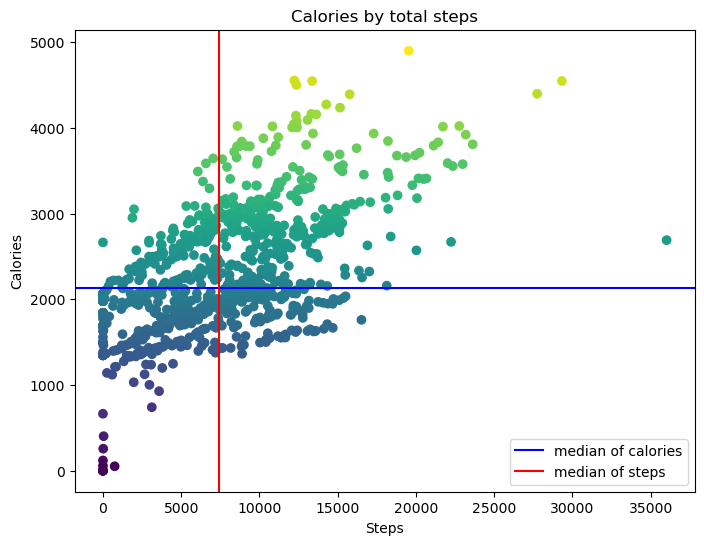

In [42]:
# Visualize the relationship between the TotalSteps column and the Calories column
plt.figure(figsize=(8, 6))
plt.scatter(df['TotalSteps'],df['Calories'],c = df['Calories'])

median_steps = 7405
median_calories = 2134

plt.axhline(median_calories, color = 'blue', label='median of calories')
plt.axvline(median_steps, color = 'red', label='median of steps')


plt.xlabel('Steps')
plt.ylabel('Calories')

plt.title('Calories by total steps');
plt.legend()
plt.show()

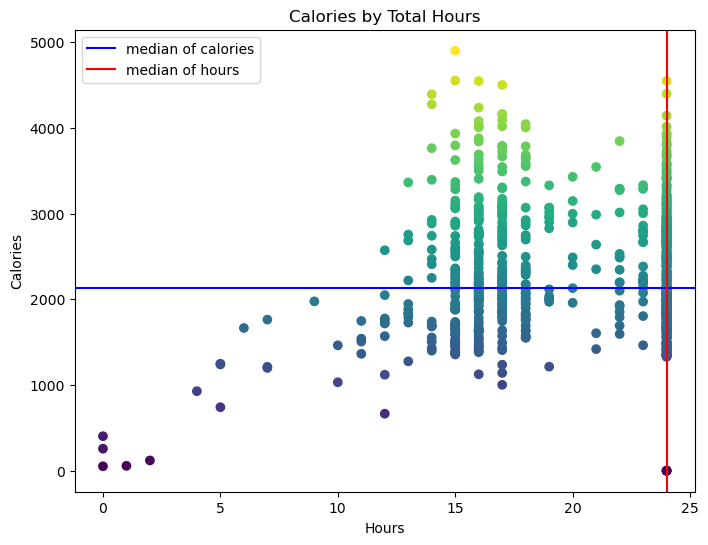

In [39]:
# Visualize the relationship between the TotalHours column and the Calories column
plt.figure(figsize=(8, 6))
plt.scatter(df['TotalHours'],df['Calories'],c = df['Calories'])

median_hours = 24
median_calories = 2134

plt.axhline(median_calories, color = 'blue', label='median of calories')
plt.axvline(median_hours, color = 'red', label='median of hours')


plt.xlabel('Hours')
plt.ylabel('Calories')

plt.title('Calories by Total Hours');
plt.legend()
plt.show()

we notice that there is a weak relationship between them, and I think this happened because the few number of active minutes

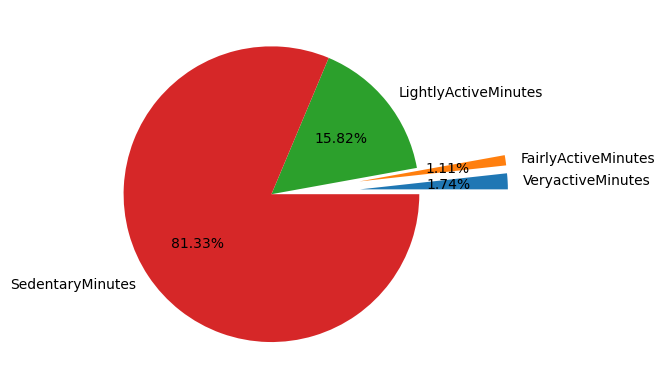

In [45]:
# Visualize the percentage of each column of these columns {VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes}
FairlyActiveMinutes = df['FairlyActiveMinutes'].sum()
VeryActiveMinutes = df['VeryActiveMinutes'].sum()
LightlyActiveMinutes = df['LightlyActiveMinutes'].sum()
SedentaryMinutes = df['SedentaryMinutes'].sum()
    
minutes = [VeryactiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes]
labels = ['VeryactiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']

plt.pie(minutes, labels=labels, autopct='%1.2f%%', explode=[0.6, 0.6, 0, 0]);

We can say that most people use the company's products to calculate calories burned in normal daily activities such as walking to the market or to the bus stop, etc., and not sports activities such as running.

**Conclusion: 81 percent of users use the program to calculate calories burned in normal daily activities, and they are also very active in the middle and end of the week**